In [10]:
import numpy as np
import sys
import librosa
import librosa.display
import os
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import skimage
import skimage.io

In [11]:
TEST_FILE_PATH = '03-01-03-02-01-02-09.wav'
y,sr = librosa.load(TEST_FILE_PATH)
librosa.feature.melspectrogram(y=y, sr=sr)

array([[1.8119039e-05, 1.3417269e-04, 2.3830793e-04, ..., 1.9946252e-05,
        1.3657951e-05, 2.4572093e-05],
       [1.1592232e-05, 6.8655980e-05, 1.7288236e-04, ..., 4.5302677e-06,
        2.3562507e-06, 4.6764017e-06],
       [2.2198051e-06, 3.2430073e-06, 9.7791371e-06, ..., 2.9494486e-06,
        3.3913780e-06, 6.6861053e-06],
       ...,
       [6.1075052e-09, 5.7121561e-09, 5.1501718e-09, ..., 2.8204383e-08,
        1.5332986e-08, 1.1549241e-08],
       [1.5425431e-09, 1.0867323e-09, 1.1603891e-09, ..., 5.5179750e-09,
        4.4739221e-09, 3.8388199e-09],
       [1.4749106e-10, 9.1576788e-11, 7.8368485e-11, ..., 6.4298911e-10,
        5.3084515e-10, 9.4507691e-10]], dtype=float32)

In [12]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
S

array([[1.8119039e-05, 1.3417269e-04, 2.3830793e-04, ..., 1.9946252e-05,
        1.3657951e-05, 2.4572093e-05],
       [1.1592232e-05, 6.8655980e-05, 1.7288236e-04, ..., 4.5302677e-06,
        2.3562507e-06, 4.6764017e-06],
       [2.2198051e-06, 3.2430073e-06, 9.7791371e-06, ..., 2.9494486e-06,
        3.3913780e-06, 6.6861053e-06],
       ...,
       [6.1075052e-09, 5.7121561e-09, 5.1501718e-09, ..., 2.8204383e-08,
        1.5332986e-08, 1.1549241e-08],
       [1.5425431e-09, 1.0867323e-09, 1.1603891e-09, ..., 5.5179750e-09,
        4.4739221e-09, 3.8388199e-09],
       [1.4749106e-10, 9.1576788e-11, 7.8368485e-11, ..., 6.4298911e-10,
        5.3084515e-10, 9.4507691e-10]], dtype=float32)

In [13]:
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S

array([[1.68955812e-05, 1.29353139e-04, 2.06189114e-04, ...,
        2.22435265e-05, 1.61418029e-05, 2.75862149e-05],
       [1.45161684e-05, 9.74407376e-05, 2.45708274e-04, ...,
        6.00038993e-06, 2.28351860e-06, 5.79308335e-06],
       [2.93823132e-06, 4.81640427e-06, 1.31065735e-05, ...,
        1.86727891e-06, 2.87409921e-06, 5.70189150e-06],
       ...,
       [6.46784803e-09, 5.62766234e-09, 5.73911274e-09, ...,
        4.55359981e-08, 3.08009724e-08, 1.77468138e-08],
       [5.00293718e-09, 7.40789474e-09, 9.95141480e-09, ...,
        2.71381388e-08, 1.35408662e-08, 1.14233067e-08],
       [8.02550737e-09, 8.05573386e-09, 8.00890110e-09, ...,
        3.13841184e-08, 2.06634727e-08, 1.62328071e-08]], dtype=float32)

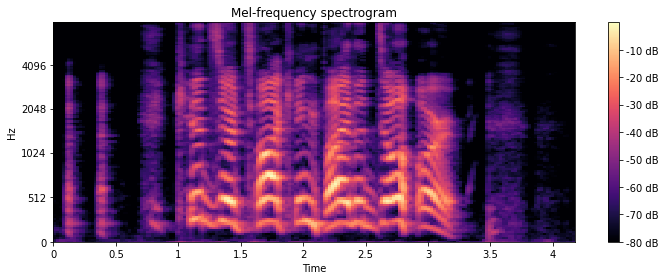

In [15]:
plt.figure(figsize=(10, 4))

S_dB = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_dB, 
                         x_axis='time', 
                         y_axis='mel',
                         sr=sr, 
                         fmax=8000)

plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [8]:
S_dB.shape

(128, 180)

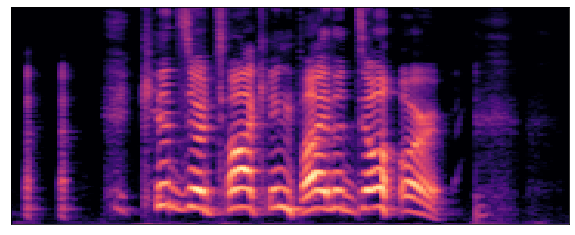

In [21]:
plt.figure(figsize=(10, 4))

S_dB = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_dB, 
                         #x_axis='time', 
                         #y_axis='mel',
                         sr=sr, 
                         fmax=8000)

#plt.colorbar(format='%+2.0f dB')
#plt.title('Mel-frequency spectrogram')
#plt.tight_layout()
plt.show()

In [23]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

# min-max scale to fit inside 8-bit range
img = scale_minmax(S_dB, 0, 255).astype(np.uint8)
img = np.flip(img, axis=0) # put low frequencies at the bottom in image
img = 255-img # invert. make black==more energy

# save as PNG
skimage.io.imsave('out.png', img)

In [24]:
skimage.io.imsave('out.png', S_dB)

Lossy conversion from float32 to uint8. Range [-80.0, -1.9073486328125e-06]. Convert image to uint8 prior to saving to suppress this warning.


In [18]:
float('inf')

inf